# Carga de Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install dabl
import dabl
!pip install imbalanced-learn
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Carga de datasets

**1 - Credit Card Dataset**

In [2]:
# https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction?select=application_record.csv
# https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction?select=credit_record.csv
# df_credito = pd.read_csv('application_record.csv')
# !ls "/content/drive/MyDrive/Colab Notebooks"

In [87]:
df_credito = pd.read_csv('drive/MyDrive/Colab Notebooks/application_record.csv')
df_record = pd.read_csv('drive/MyDrive/Colab Notebooks/credit_record.csv')

# Objetivo

Evaluar los datos del dataset seleccionado para poder predecir el riesgo de pago de los clientes conociendo primero su posicion actual

## Contexto

Luego de cruzar los datos contenidos en los dataset, contamos con una base de 36.457 registros. Agregado a la base esta el campo de riesgo que en total tiene 4.291 registros con riesgo (se considera en riesgo los registros que tuvieron mora al menos 1 vez, mayor a 30 días)

# Descripción del problema

El dataset seleccionado lo usaremos para el análisis de riesgo crediticio considerando distintas variables que demostrarían la posición actual y capacidad de pago de la persona.
La base final tiene 36.457 registros, 2/3 de genero F y 1/3 M. La edad media es de 42 años y la media de ingreso anual es de 157.500, vemos que la edad no tiene tanta influencia en la media de ingreso. Un poco más del 50% de la base esta compuesta por empleados, después socios comerciales con 25% aprox, 20% de pensionados y 5% de empleados del estado. Hay una fuerte relación entre empleados y personas que terminaron la secundaria. Aunque varia mucho el ingreso por tipo de ocupación la media más alta la tienen los Manager y después Realty Agents. Agregado a la base esta el dato de riesgo que en total tiene 4.291 registros en riesgo (se considera en riesgo los registros que tuvieron mora al menos 1 vez, mayor a 30 días)

# Análisis de datos

In [88]:
df_credito.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


Descripción variables application_record<br>
FLAG_OWN_CAR, si tiene auto<br>
FLAG_OWN_REALTY, si tiene vivienda<br>
CNT_CHILDREN, cantidad de hijos<br>
AMT_INCOME_TOTAL, ingreso anual<br>
NAME_INCOME_TYPE, tipo de ingreso (empleado, estudiante, pensionado)<br>
NAME_EDUCATION_TYPE, nivel de educación<br>
NAME_FAMILY_STATUS, casado o soltero<br>
NAME_HOUSING_TYPE, tipo de vivienda<br>
DAYS_BIRTH, fecha de nacimiento<br>
DAYS_EMPLOYED, dias empleado<br>
OCCUPATION_TYPE, ocupación<br>
CNT_FAM_MEMBERS, cantidad de miembros en la familia<br>

In [89]:
# Descripción variables credit_record
# STATUS: meses con deuda (de 0 a 5 mes, C pago deuda, X sin credito)
# MONTHS_BALANCE: meses con el credito
df_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [90]:
# Nueva columna riesgo: 1 deudas, 0 sin deudas
df_record['riesgo'] = np.where((df_record['STATUS'] == '1') | (df_record['STATUS'] == '2') | (df_record['STATUS'] == '3' )| (df_record['STATUS'] == '4' )| (df_record['STATUS'] == '5'), 1, 0)
df_record.head()

,ID,MONTHS_BALANCE,STATUS,riesgo
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0


In [91]:
# Nuevo df sin duplicados en la columna status
def_record = df_record.sort_values('riesgo', ascending=False).drop_duplicates(subset=['ID'])
len(def_record)

45985

In [92]:
def_record = def_record[['ID','riesgo']]
def_record.reset_index(drop=True, inplace=True)
def_record.head()

,ID,riesgo
0,5060435,1
1,5023323,1
2,5117007,1
3,5114353,1
4,5067202,1


In [93]:
len(set(df_credito['ID']).intersection(set(def_record['ID'])))


36457

## Unión de las dos bases

In [94]:
credit_record = pd.merge(df_credito,def_record, on='ID', how='inner')
credit_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,riesgo
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0


In [95]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [96]:
# FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL de tipo int a object
for column in credit_record.iloc[:,12:16].columns:
  credit_record[column] = credit_record[column].astype('object')

credit_record.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL              object
FLAG_WORK_PHONE         object
FLAG_PHONE              object
FLAG_EMAIL              object
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
riesgo                   int64
dtype: object

In [97]:
credit_record.set_index('ID').head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,riesgo
ID,,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0


## Análisis de nulos

In [98]:
credit_record.isna().sum().sort_values(ascending=False).head(3)

OCCUPATION_TYPE    11323
ID                     0
DAYS_BIRTH             0
dtype: int64

In [99]:
# En principio remplazo nulos por Other
credit_record.OCCUPATION_TYPE.fillna('Other', inplace=True)

## EDA

In [100]:
credit_record.describe(include='all').head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,riesgo
count,3.645700e+04,36457,36457,36457,36457.000000,36457.000000,36457,36457,36457,36457,36457.000000,36457.000000,36457.0,36457.0,36457.0,36457.0,36457,36457.000000,36457.0000
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,1.0,2.0,2.0,2.0,19,NaN,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,1.0,0.0,0.0,0.0,Other,NaN,NaN
freq,NaN,24430,22614,24506,NaN,NaN,18819,24777,25048,32548,NaN,NaN,36457.0,28235.0,25709.0,33186.0,11323,NaN,NaN
mean,5.078227e+06,NaN,NaN,NaN,0.430315,186685.736662,NaN,NaN,NaN,NaN,-15975.173382,59262.935568,NaN,NaN,NaN,NaN,NaN,2.198453,0.1177


In [101]:
credit_record.CNT_CHILDREN.value_counts()

0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: CNT_CHILDREN, dtype: int64

In [102]:
credit_record.OCCUPATION_TYPE.value_counts()

Other                    11323
Laborers                  6211
Core staff                3591
Sales staff               3485
Managers                  3012
Drivers                   2138
High skill tech staff     1383
Accountants               1241
Medicine staff            1207
Cooking staff              655
Security staff             592
Cleaning staff             551
Private service staff      344
Low-skill Laborers         175
Waiters/barmen staff       174
Secretaries                151
HR staff                    85
Realty agents               79
IT staff                    60
Name: OCCUPATION_TYPE, dtype: int64

In [103]:
# Pasando a positivos los dias de nacimiento y de empleado
credit_record['DAYS_BIRTH'] = credit_record['DAYS_BIRTH'] *-1
credit_record['DAYS_EMPLOYED'] = credit_record['DAYS_EMPLOYED'] *-1

In [104]:
# Creo la columna AGE y elimino DAYS_BIRTH
credit_record['AGE'] = credit_record['DAYS_BIRTH']/365.25
credit_record['AGE'] = credit_record['AGE'].apply(np.floor)
credit_record.drop(columns=['DAYS_BIRTH'], inplace=True)

### Variables Categoricas

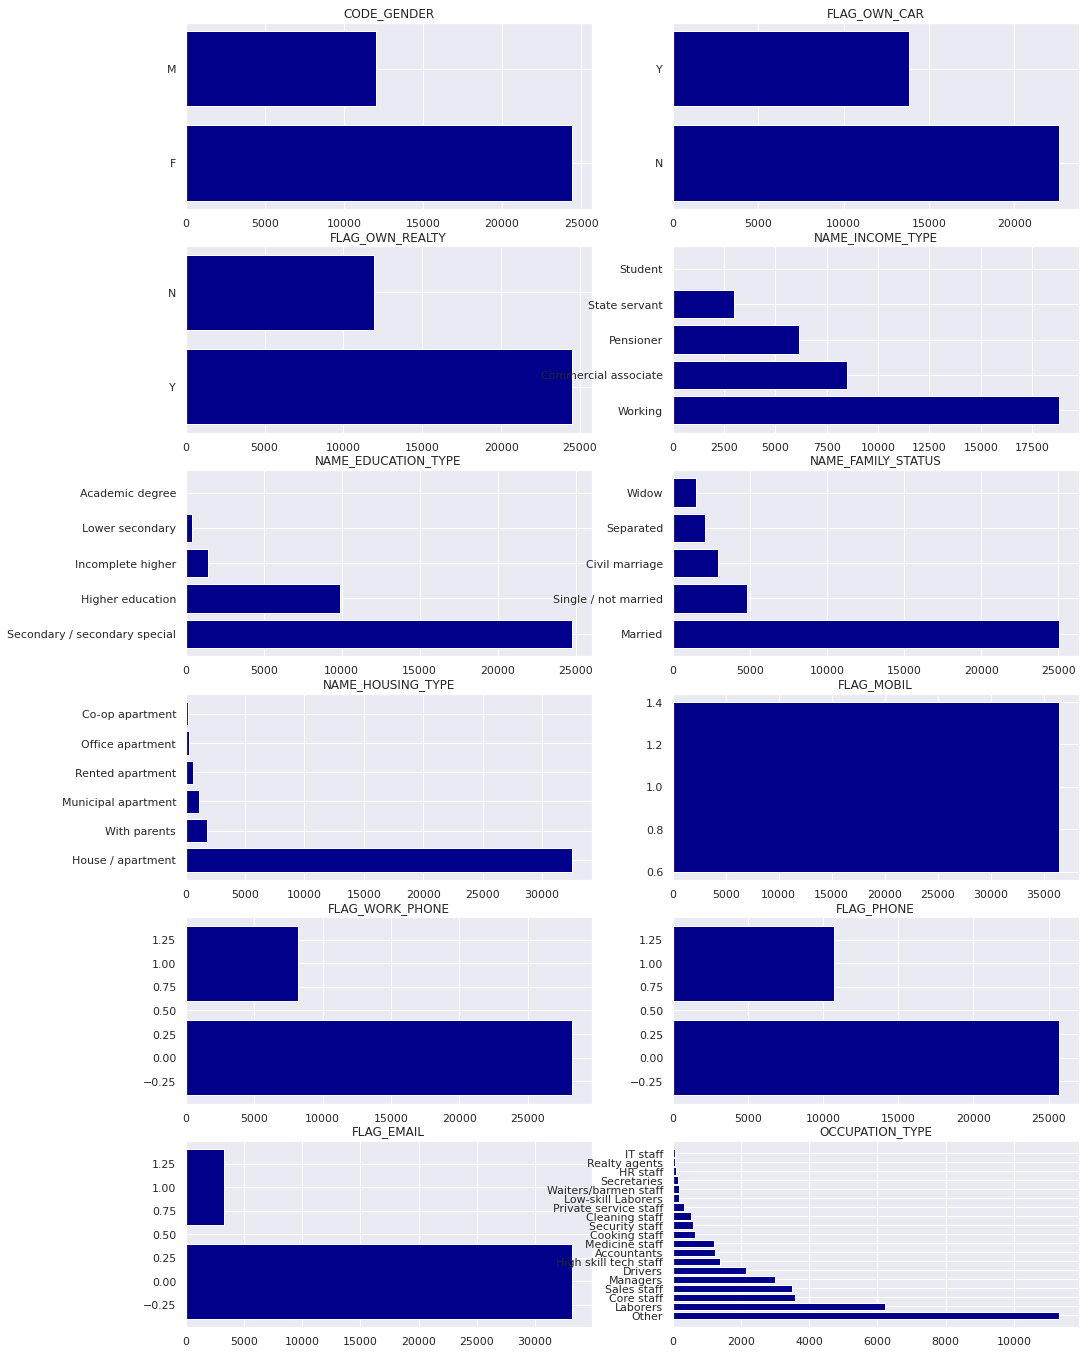

In [105]:
# Distribución de variables
fig, ax = plt.subplots(nrows=6, ncols=2,figsize=(16, 24))
ax = ax.flat
for cada, variable in enumerate(credit_record.select_dtypes('O')):
    ax[cada].barh(y = credit_record[variable].value_counts().index, width = credit_record[variable].value_counts(), color = 'darkblue')
    ax[cada].set_title(variable)

Conclusión
* NAME_HOUSING_TYPE: El 90% tiene casa / apartamento (eliminar variable)
* NAME_FAMILY_STATUS: Casi el 70% esta casado (eliminar variable)
* FLAG_MOBIL: tiene un solo dato (eliminar variable)
* FLAG_EMAIL: más del 90% tiene email (eliminar variable)

In [106]:
credit_record[['NAME_HOUSING_TYPE']].value_counts(normalize = True) *100

NAME_HOUSING_TYPE  
House / apartment      89.277779
With parents            4.871492
Municipal apartment     3.094056
Rented apartment        1.577201
Office apartment        0.718655
Co-op apartment         0.460817
dtype: float64

In [107]:
credit_record.drop(columns='NAME_FAMILY_STATUS', inplace=True)
credit_record.drop(columns='NAME_HOUSING_TYPE', inplace=True)
credit_record.drop(columns='FLAG_MOBIL', inplace=True)
credit_record.drop(columns='FLAG_EMAIL', inplace=True)

In [108]:
credit_record.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'riesgo', 'AGE'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x7f46385a0c40>,
 [Text(-0.05594916302333328, 1.0985762109007224, 'Working'),
  Text(-0.7396198522188606, -0.8142250758873439, 'Commercial associate'),
  Text(0.5506838377905777, -0.9522328028356516, 'Pensioner'),
  Text(1.063277145409221, -0.2818540616177429, 'State servant'),
  Text(1.099999505715993, -0.0010427965147598564, 'Student')])

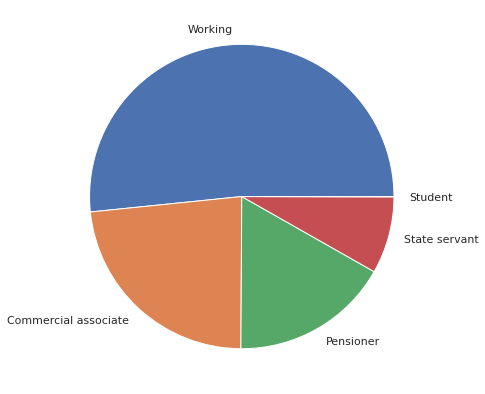

In [109]:
# Distribución de tipos de ingreso
fig,ax = plt.subplots(figsize =(10, 7))
ax.pie(credit_record['NAME_INCOME_TYPE'].value_counts(), labels = credit_record['NAME_INCOME_TYPE'].value_counts().index)

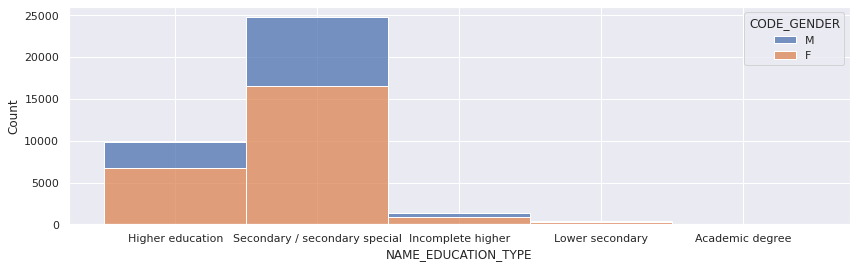

In [110]:
# Distribución de tipo de educación y genero
sns.set(rc={'figure.figsize':(14,4)})
sns.histplot(data=credit_record, x='NAME_EDUCATION_TYPE', hue='CODE_GENDER', multiple='stack')

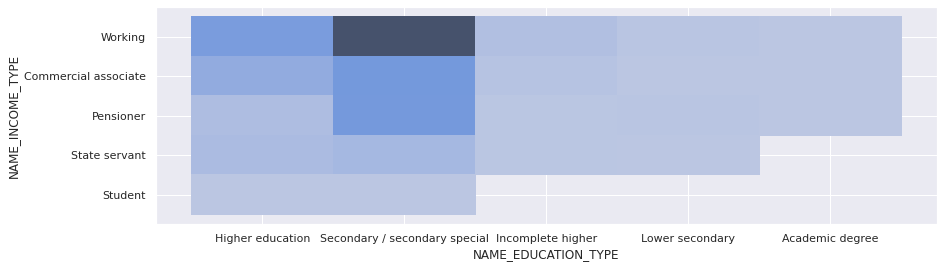

In [111]:
# Relación entre tipo de educación y tipos de ingreso
sns.histplot(data=credit_record, x='NAME_EDUCATION_TYPE',y = 'NAME_INCOME_TYPE')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

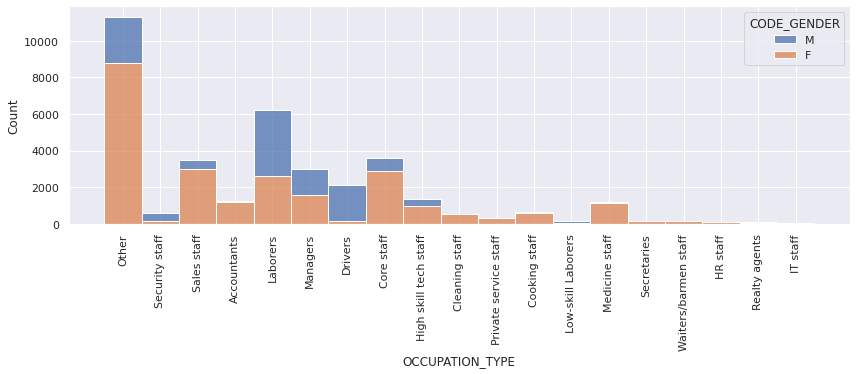

In [112]:
# Distribucion de tipos de ocupación y genero
plt.figure(figsize = (14,4))
ax = sns.histplot(data=credit_record, x="OCCUPATION_TYPE", hue="CODE_GENDER", multiple="stack")
plt.xticks(rotation=90)

### Variables Numéricas

In [113]:
credit_record.select_dtypes('number').describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ID,36457.0,5078227.00,41875.24,5008804.0,5042028.0,5074614.0,5115396.0,5150487.0
CNT_CHILDREN,36457.0,0.43,0.74,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,36457.0,186685.74,101789.23,27000.0,121500.0,157500.0,225000.0,1575000.0
DAYS_EMPLOYED,36457.0,-59262.94,137651.33,-365243.0,408.0,1552.0,3153.0,15713.0
CNT_FAM_MEMBERS,36457.0,2.20,0.91,1.0,2.0,2.0,3.0,20.0
riesgo,36457.0,0.12,0.32,0.0,0.0,0.0,0.0,1.0
AGE,36457.0,43.23,11.50,20.0,34.0,42.0,53.0,68.0


La media de edad es: 42.0
El ingreso anual medio es: 157500.0


Text(0, 0.5, 'ANNUAL INCOME')

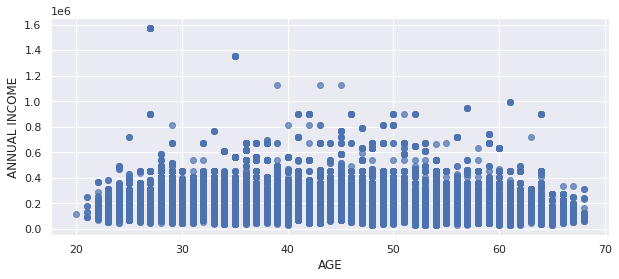

In [114]:
# Relación entre edad e ingresos anuales
print('La media de edad es: ' + str(credit_record.AGE.median()))
print('El ingreso anual medio es: ' + str(credit_record.AMT_INCOME_TOTAL.median()))
fig,ax = plt.subplots(figsize =(10, 4))
ax.scatter(credit_record['AGE'], credit_record['AMT_INCOME_TOTAL'], alpha=0.7)
ax.set_xlabel('AGE')
ax.set_ylabel('ANNUAL INCOME')

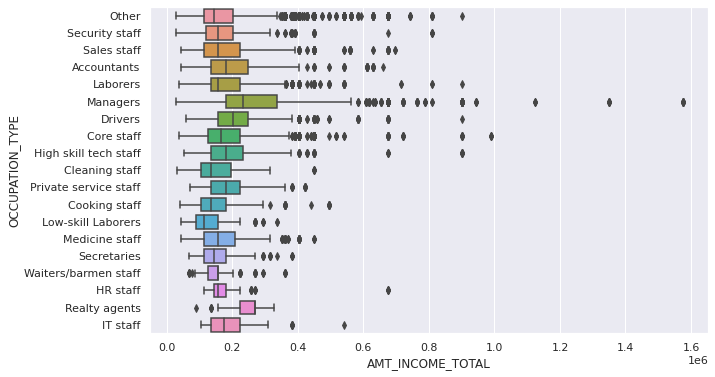

In [115]:
# Distribucion de salarios anuales
plt.figure(figsize = (10,6))
sns.boxplot(data=credit_record, y="OCCUPATION_TYPE", x='AMT_INCOME_TOTAL')

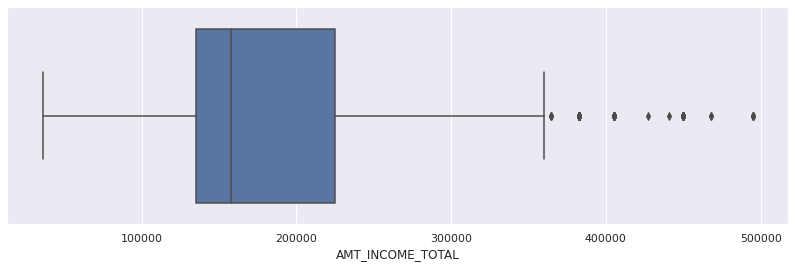

In [116]:
# Df de laborers
# Distribucion de salarios anuales de laborers menores a 500.000
laborers = credit_record.loc[(credit_record.OCCUPATION_TYPE == 'Laborers') & (credit_record.AMT_INCOME_TOTAL < 500000)]
sns.boxplot(x = laborers['AMT_INCOME_TOTAL'])

## Insights

In [117]:
# Porcentaje con riesgo
credit_record[['riesgo']].value_counts(normalize = True) *100

riesgo
0         88.22997
1         11.77003
dtype: float64

Hay algun perfil especifico en riesgo?

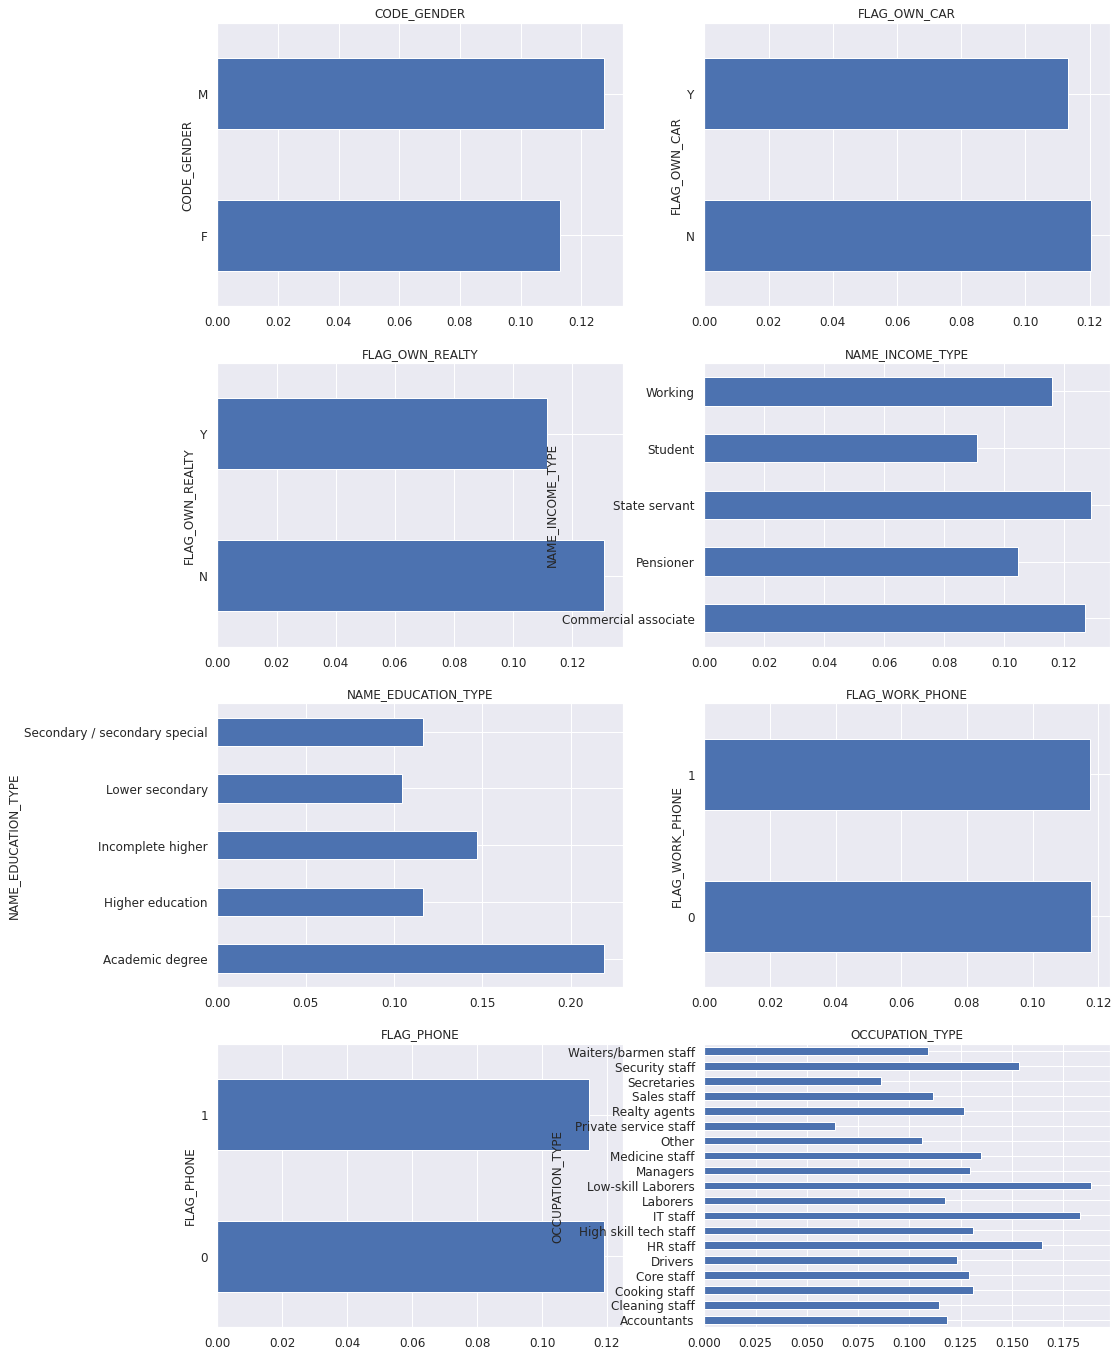

In [118]:
f, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (16, 24))
ax = ax.flat
for cada, variable in enumerate(credit_record.select_dtypes('O')):
      credit_record.groupby(variable).riesgo.mean().plot.barh(ax = ax[cada])
      ax[cada].set_title(variable, fontsize = 12)
      ax[cada].tick_params(labelsize = 12)

En general es bajo el riesgo pero los mas altos son:
* Personas con Tipo de Educación: Academic degree
* Personas con Tipo de Ocupación: Security staff, Low-skill Laborers, IT staff y HR staff

In [119]:
# Reemplazar GENDER: M=1, F=0
# Reemplazar FLAG_OWN_CAR	FLAG_OWN_REALTY: Y=1, F=0
credit_record['CODE_GENDER'].replace({'M': 1, 'F': 0}, inplace=True)
credit_record['FLAG_OWN_CAR'].replace({'Y': 1, 'N': 0},inplace=True)
credit_record['FLAG_OWN_REALTY'].replace({'Y': 1, 'N': 0},inplace=True)
credit_record.dtypes

ID                       int64
CODE_GENDER              int64
FLAG_OWN_CAR             int64
FLAG_OWN_REALTY          int64
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
DAYS_EMPLOYED            int64
FLAG_WORK_PHONE         object
FLAG_PHONE              object
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
riesgo                   int64
AGE                    float64
dtype: object

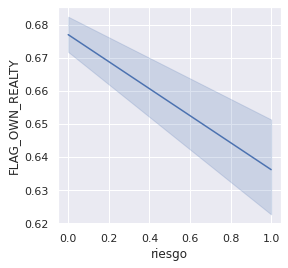

In [120]:
plt.figure(figsize = (4,4))
sns.lineplot(data=credit_record, y="FLAG_OWN_REALTY", x='riesgo')

In [121]:
credit_record.corr(method = 'pearson').loc['riesgo']

ID                  0.003565
CODE_GENDER         0.021257
FLAG_OWN_CAR       -0.010580
FLAG_OWN_REALTY    -0.027990
CNT_CHILDREN        0.011525
AMT_INCOME_TOTAL    0.024202
DAYS_EMPLOYED       0.021566
CNT_FAM_MEMBERS     0.009004
riesgo              1.000000
AGE                -0.029135
Name: riesgo, dtype: float64

In [122]:
# credit_record[credit_record.riesgo == 1].drop(['OCCUPATION_TYPE'],axis=1).corr(method = 'pearson')
credit_record.corr(method = 'pearson').style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-122-d2277e05b87e>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  credit_record.corr(method = 'pearson').style.background_gradient(cmap='coolwarm').set_precision(2)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,CNT_FAM_MEMBERS,riesgo,AGE
ID,1.00,0.01,-0.01,-0.10,0.03,-0.02,0.04,0.03,0.00,-0.06
CODE_GENDER,0.01,1.00,0.36,-0.05,0.08,0.20,0.17,0.11,0.02,-0.20
FLAG_OWN_CAR,-0.01,0.36,1.00,-0.02,0.11,0.22,0.16,0.15,-0.01,-0.16
FLAG_OWN_REALTY,-0.10,-0.05,-0.02,1.00,-0.00,0.03,-0.09,-0.01,-0.03,0.13
CNT_CHILDREN,0.03,0.08,0.11,-0.00,1.00,0.03,0.23,0.89,0.01,-0.34
AMT_INCOME_TOTAL,-0.02,0.20,0.22,0.03,0.03,1.00,0.17,0.02,0.02,-0.07
DAYS_EMPLOYED,0.04,0.17,0.16,-0.09,0.23,0.17,1.00,0.22,0.02,-0.62
CNT_FAM_MEMBERS,0.03,0.11,0.15,-0.01,0.89,0.02,0.22,1.00,0.01,-0.30
riesgo,0.00,0.02,-0.01,-0.03,0.01,0.02,0.02,0.01,1.00,-0.03
AGE,-0.06,-0.20,-0.16,0.13,-0.34,-0.07,-0.62,-0.30,-0.03,1.00


# Preparación de datos para el modelo de ML

In [123]:
# Pasar DAYS_EMPLOYED a años y eliminar days
credit_record['YEARS_EMPLOYED'] = (credit_record['DAYS_EMPLOYED'] / 365).astype('int')
credit_record.drop(columns='DAYS_EMPLOYED', inplace=True)

In [124]:
# Columnas a int
credit_record['FLAG_WORK_PHONE'] = credit_record['FLAG_WORK_PHONE'].astype('int')
credit_record['FLAG_PHONE'] = credit_record['FLAG_PHONE'].astype('int')
credit_record['CNT_FAM_MEMBERS'] = credit_record['CNT_FAM_MEMBERS'].astype('int')
credit_record['AGE'] = credit_record['AGE'].astype('int')
credit_record['AMT_INCOME_TOTAL'] = credit_record['AMT_INCOME_TOTAL'].astype('int')

In [125]:
credit_record.set_index('ID', inplace=True)

In [126]:
from sklearn.preprocessing import OneHotEncoder

# Variables categoricas
cat_var = credit_record.select_dtypes('O')

# Instanciar
ohe = OneHotEncoder(sparse = False)

# Entrenar
ohe.fit(cat_var)

# Aplicar
cat_ohe = ohe.transform(cat_var)

# Agregar los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat_var.columns)).reset_index(drop = True)

In [127]:
cat_ohe.head()

,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Other,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [128]:
cat_num = credit_record.select_dtypes('number').reset_index(drop = True)

In [129]:
credit_ml = pd.concat([cat_ohe,cat_num], axis = 1)
credit_ml.head()

,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,...,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,riesgo,AGE,YEARS_EMPLOYED
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,1,0,427500,1,0,2,1,32,12
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,1,0,427500,1,0,2,1,32,12
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,1,0,112500,0,0,2,0,58,3
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,270000,0,1,1,0,52,8
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,270000,0,1,1,0,52,8


## Modelo ML

In [130]:
# Separar variable predictora y target
X = credit_ml.drop(columns='riesgo')
y = credit_ml['riesgo']

In [131]:
# Separar train y test
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2) 

## Entrenamiento del Modelo

In [132]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar
dtc = DecisionTreeClassifier(random_state=1234, max_depth=4)

# Entrenar
dtc.fit(train_X,train_y)

DecisionTreeClassifier(max_depth=4, random_state=1234)

## Predicción y validación

In [133]:
# Predicción
preds = dtc.predict(test_X)

In [134]:
# Evaluación
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y,preds)

0.5003342454488743

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

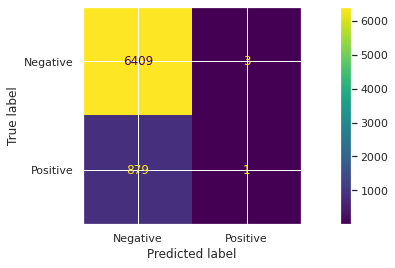

In [135]:
from sklearn import metrics
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(dtc, test_X, test_y, display_labels=['Negative', 'Positive'])

In [136]:
accuracy = metrics.accuracy_score(test_y, preds)
accuracy 

0.8790455293472298

In [137]:
# Precision se evalua para cada categoria
precision_positiva = metrics.precision_score(test_y, preds, pos_label=1)
precision_negativa = metrics.precision_score(test_y, preds, pos_label=0)
precision_positiva, precision_negativa 

(0.25, 0.879390779363337)

In [138]:
recall_sensibilidad = metrics.recall_score(test_y, preds, pos_label=1)
recall_especificidad = metrics.recall_score(test_y, preds, pos_label=0)
recall_sensibilidad, recall_especificidad

(0.0011363636363636363, 0.9995321272613849)

### Resultado del 1er modelo (DecisionTreeClassifier)

In [139]:
print(metrics.classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      6412
           1       0.25      0.00      0.00       880

    accuracy                           0.88      7292
   macro avg       0.56      0.50      0.47      7292
weighted avg       0.80      0.88      0.82      7292



Como conclusion, la precision del modelo actual es muy baja. Para la prediccion negativa esta bien pero es de esperar porque la tasa de riesgo es de 12% (si el modelo marca todos lo casos como negativos la precision igual es 88%). El tema a mejorar seria la prediccion de los positivos, quizas quitando algunas variables y en caso de que no mejore usar otro modelo. 

### Prueba con otro algoritomo (RandomForestClassifier)

In [152]:
# Uso de la libreria dabl para ver cual es el modelo recomendado
model = dabl.AnyClassifier()
model.fit(train_X, train_y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

best classifier:  RandomForestClassifier(max_features='sqrt')
best score: 0.628


AnyClassifier()

In [141]:
from sklearn.ensemble import RandomForestClassifier

# Instanciar
rfc = RandomForestClassifier(random_state=1234)

# Entrenar
rfc.fit(train_X,train_y)

RandomForestClassifier(random_state=1234)

In [142]:
# Predicción
preds_rfc = rfc.predict(test_X)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

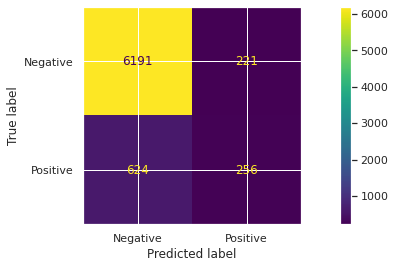

In [143]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(rfc, test_X, test_y, display_labels=['Negative', 'Positive'])

Resultado: Aun falta precisión en la predicción de riesgo positivo.
Aplicar RandomOverSampler para balancear los datos

### Balanceo de datos (RamdomOverSampler)

In [144]:
from imblearn.over_sampling import RandomOverSampler

# Balancear hacia arriba para que los clientes en riesgo sean el 50%
oversample = RandomOverSampler(sampling_strategy=0.5)

#Entrenar
X_over, y_over = oversample.fit_resample(X, y)

In [145]:
# Entrenar modelo balanceado
rfc.fit(X_over,y_over)

RandomForestClassifier(random_state=1234)

In [146]:
# Predicción
preds_rfc = rfc.predict(test_X)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

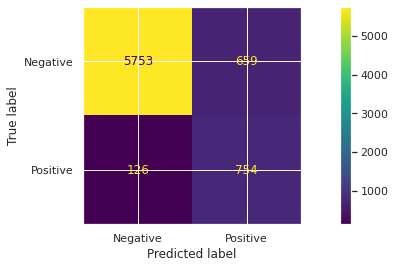

In [147]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(rfc, test_X, test_y, display_labels=['Negative', 'Positive'])

In [148]:
recall_sensibilidad = metrics.recall_score(test_y, preds_rfc, pos_label=1)
recall_especificidad = metrics.recall_score(test_y, preds_rfc, pos_label=0)
recall_sensibilidad, recall_especificidad

(0.8568181818181818, 0.897223955084217)

In [149]:
roc_auc_score(test_y,preds_rfc)

0.8770210684511995

In [150]:
print(metrics.classification_report(test_y, preds_rfc))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      6412
           1       0.53      0.86      0.66       880

    accuracy                           0.89      7292
   macro avg       0.76      0.88      0.80      7292
weighted avg       0.92      0.89      0.90      7292



Conclusión: Luego de cambiar el algoritmo por RamdomForest y balancear los datos con RamdomOverSampler se mejoro bastante la precisión del modelo:

*   Relación de positivos: 88%
*   Sensibilidad: 86%
*   Especificidad:90%

